Mount drive, if you want to run all the code to in sequence, please remember to empty out the img_data directory

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Packages Loading

In [ ]:
# import general necessary packages
from sklearn import metrics
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os, cv2
# import the necessary packages 
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers.convolutional import Conv2D
from tensorflow.python.keras.layers.convolutional import MaxPooling2D
from tensorflow.python.keras.layers.core import Activation
from tensorflow.python.keras.layers.core import Dropout
from tensorflow.python.keras.layers.core import Dense
from tensorflow.python.keras.layers import Flatten
from tensorflow.python.keras.layers import Input
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.optimizers import Adam, RMSprop
from numpy.random import seed
#from tensorflow import set_random_seed
from numpy import savez_compressed
from tensorflow.python.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from scipy.io.wavfile import read
from os import walk
import librosa
%matplotlib inline
from PIL import Image
import pathlib
import csv
from sklearn.preprocessing import LabelEncoder, StandardScaler
import keras
from matplotlib import pyplot
from tensorflow.python.keras import layers
from tensorflow.python.keras.layers import GlobalMaxPooling2D, GlobalAveragePooling1D, AveragePooling2D, Input, Add
from tensorflow.python.keras.optimizers import SGD
from numpy import argmax
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
import glob

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Data Loading (Please upload my file directory and use those paths to be able to run this code), unless you are sharing/mounting my project folder link

#### Image Data

In [ ]:
#This converts the sound/.wav files into spectograms, you shouldn't need to run this as it's already been done, running this again will increase the images in the directory so they'd need to be deleted first in the img_data directory
cmap = plt.get_cmap('inferno')
plt.figure(figsize=(8,8))
for filename in os.listdir(f'/content/drive/My Drive/Colab Notebooks/project/All Audio Samples - Augmented'): #directory for the audio samples (doubled for each origianl file 185 x 2)
  Data = f'/content/drive/My Drive/Colab Notebooks/project/All Audio Samples - Augmented/{filename}'
  y, sr = librosa.load(Data, mono=True, duration=1.5)
  plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
  plt.axis('off');
  plt.savefig(f'/content/drive/My Drive/Colab Notebooks/project/img_data/{filename[:-3].replace(".", "")}.png') #directory for the image data from the sound files
  plt.clf()
      

In [ ]:
header = 'filename' #creates headers for csv file below, please run this
for i in range(1, 1):
    header += f' mfcc{i}'
header = header.split()

In [ ]:
#Don't Rerun this unless you need to rename images.
c=1
# get a recursive list of file paths that matches pattern including sub directories
fileList = glob.glob(r'/content/drive/My Drive/Derek Chauvin Identifier/img_data/*.png', recursive=True)
# Iterate over the list of filepaths & remove/rename each file.
for filePath in fileList:
    try:
        #os.remove(filePath) #removes the file
        os.rename(filePath, r'/content/drive/My Drive/Derek Chauvin Identifier/img_data/' + str(c) +'.png') #renames the file
        c = c+1
    except OSError:
        print("Error while renaming file")

In [ ]:
file = open('dataset.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
for filename in os.listdir(f'/content/drive/My Drive/Derek Chauvin Identifier/img_data'):
  to_append = f'{filename}'    #file name compilation
  file = open('dataset.csv', 'a', newline='')
  with file:
      writer = csv.writer(file)
      writer.writerow(to_append.split())


Displaying simple wave plot (all plots are of C#3)

<class 'numpy.ndarray'> <class 'int'>


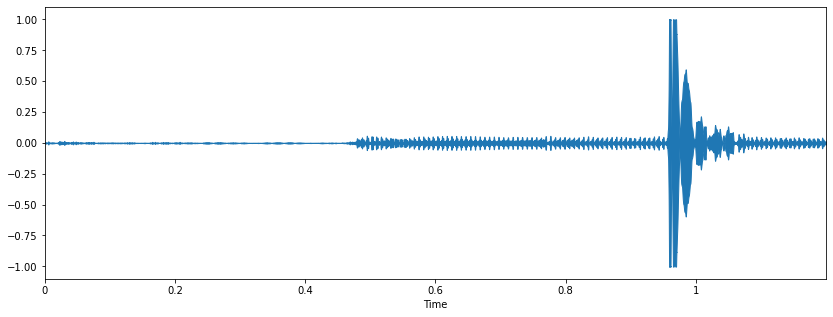

In [ ]:
audio_data = '/content/drive/My Drive/Colab Notebooks/project/All Audio Samples - Augmented/C#3-2.wav'
x , sr = librosa.load(audio_data)
print(type(x), type(sr))
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

Spectrogram plot

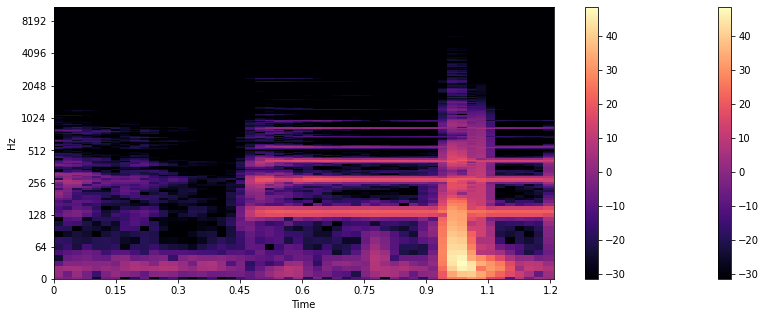

In [ ]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

Plot of spectral centroid

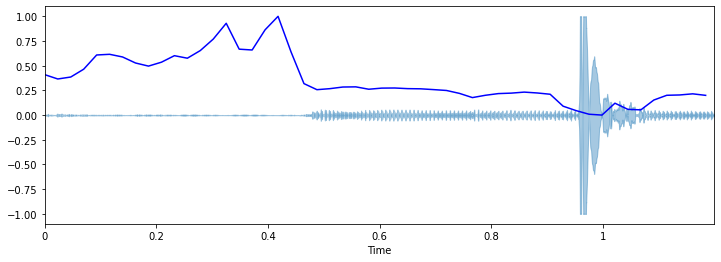

In [ ]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

plot of spectral rolloff

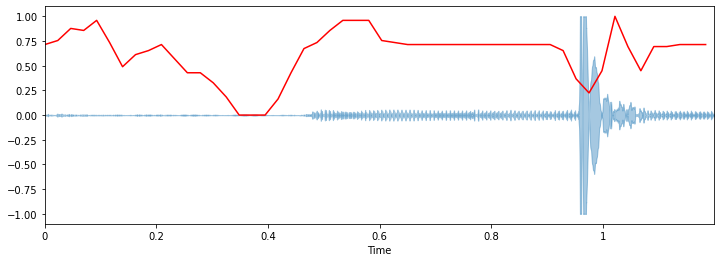

In [ ]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

plot of spectral bandwidth

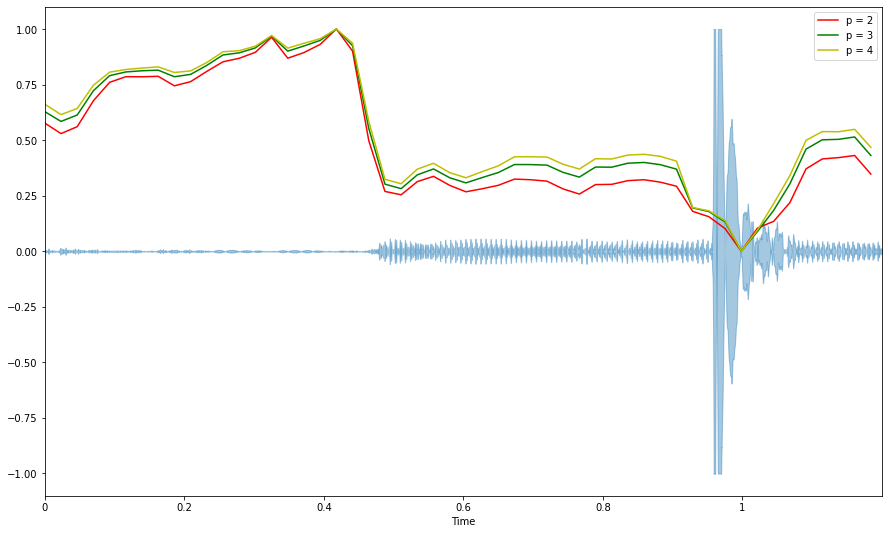

In [ ]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

plot of zero cross rate

6


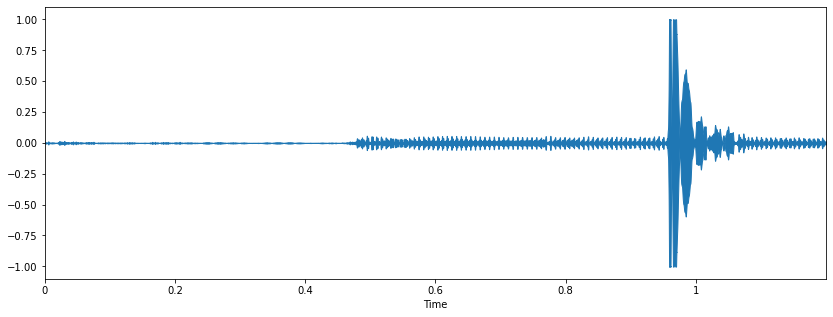

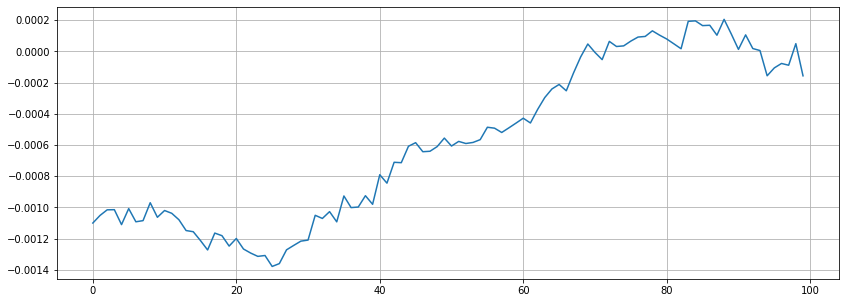

In [ ]:
#Plot signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
# Zoom in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))#6 crosses

plot of MFCC

(20, 52)


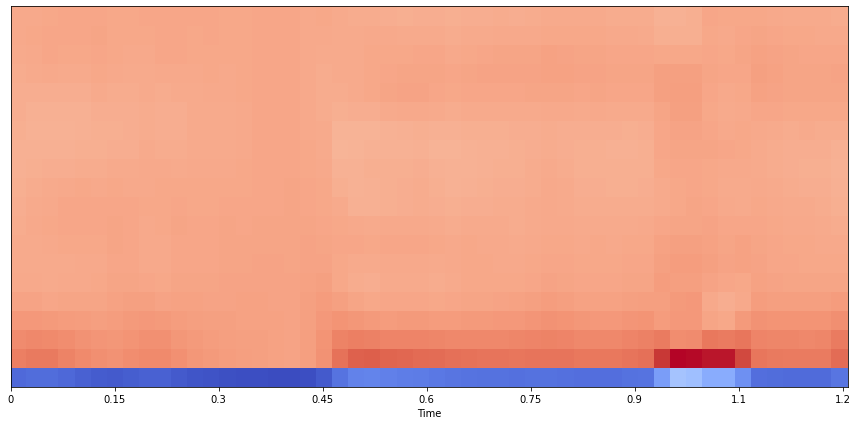

In [ ]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
(20, 52)
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

Plot of Chroma short term fourier transform (stft)

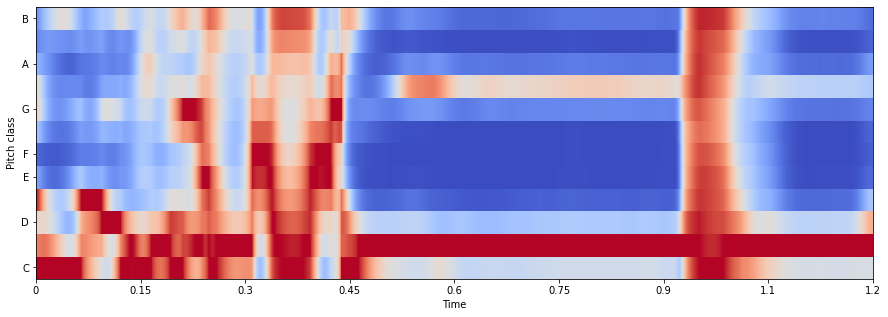

In [ ]:
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=1)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=1, cmap='coolwarm')

In [ ]:
#reading the created csv file from before here, and sorting them, please run this
data = pd.read_csv('dataset.csv')
data.sort_values(by=['filename'],inplace=True,ascending=True,ignore_index=True)
print(data['filename'][23752])
print(len(data['filename']))
data.to_csv(r'/content/drive/My Drive/Derek Chauvin Identifier/dataset.csv',index = None, header=True)
data.tail(10)

chauvin9-1.png
23753


,filename
23743,chauvin16-1.png
23744,chauvin17-1.png
23745,chauvin2-1.png
23746,chauvin3-1.png
23747,chauvin4-1.png
23748,chauvin5-1.png
23749,chauvin6-1.png
23750,chauvin7-1.png
23751,chauvin8-1.png
23752,chauvin9-1.png


In [ ]:

#I had to append manually four columns to match up the dataset to y values, my file "datasetEnhancedAug.csv" is required to do this
data2 = pd.read_csv('/content/drive/My Drive/Derek Chauvin Identifier/datasetaug.csv')
#data2.sort_values(by=['filename'],inplace=True)
data2
#data = data.merge(data2, left_on='filename', right_on='filename')
#data.to_csv(r'/content/drive/My Drive/Colab Notebooks/project/dataset.csv',index = None, header=True)
#data

,filename,ischauv
0,1.png,0
1,10.png,0
2,100.png,0
3,1000.png,0
4,10000.png,0
...,...,...
23748,chauvin5-1.png,1
23749,chauvin6-1.png,1
23750,chauvin7-1.png,1
23751,chauvin8-1.png,1


In [ ]:
#checking X/y variables
data.iloc[:, 1:-1]
data.iloc[:,1:7]
#data.iloc[:, 1:27]


,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate
0,0.494609,0.057445,897.512208,1524.761786,2216.677622,0.020292
1,0.452797,0.048388,810.964910,1494.187537,1829.944490,0.019865
2,0.469317,0.051306,811.581144,1389.106443,1917.697378,0.022433
3,0.286503,0.038913,440.878182,832.211975,540.637207,0.024449
4,0.347150,0.064649,525.212424,921.489409,895.905480,0.021156
...,...,...,...,...,...,...
365,0.330313,0.024994,1172.855050,1807.679152,2653.139085,0.036245
366,0.295049,0.016675,1180.758022,1595.135496,2640.509033,0.043185
367,0.390352,0.047020,1209.279254,1668.237555,2789.466111,0.046917
368,0.423649,0.037460,1183.042848,1740.126304,2767.016602,0.035269


Preparing Visualizations to understand the sound features extracted

In [ ]:
Plotdata = pd.read_csv('/content/drive/My Drive/Colab Notebooks/project/dataset.csv')
Plotdata.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,Note-Oct,Note,Code-Note-Oct,Octave,Code-Note
0,A#2-0.wav,0.494609,0.057445,897.512208,1524.761786,2216.677622,0.020292,-410.222854,79.036647,41.540051,17.542005,7.451231,6.032380,7.914863,7.661701,3.761475,-1.050975,-2.987164,-3.119429,-4.486166,-6.434580,-5.828149,-0.627451,6.567497,9.540198,5.932224,0.883696,A#2,A#,1,2,1
1,A#2-1.wav,0.452797,0.048388,810.964910,1494.187537,1829.944490,0.019865,-421.044491,85.120745,41.692309,16.478092,8.438673,6.774947,8.819674,9.465638,4.093943,-2.348557,-3.452015,-2.275677,-3.024034,-3.258835,-0.964259,2.904183,7.307453,8.684956,4.281436,-0.292092,A#2,A#,1,2,1
2,A#2-2.wav,0.469317,0.051306,811.581144,1389.106443,1917.697378,0.022433,-421.083599,93.405912,41.652223,16.070994,9.917962,6.636696,7.946362,10.088446,4.476042,-3.627984,-4.983836,-3.329482,-5.465973,-8.848409,-7.757842,-0.289353,8.496214,9.532154,2.632341,-2.010336,A#2,A#,1,2,1
3,A#2-3.wav,0.286503,0.038913,440.878182,832.211975,540.637207,0.024449,-454.850620,136.941887,65.018824,17.163679,6.611031,10.591685,11.818851,5.772098,-4.312867,-9.861685,-7.793310,-7.272041,-13.516201,-17.467404,-10.949569,0.231671,7.007317,7.050083,2.631895,-1.634866,A#2,A#,1,2,1
4,A#2-4.wav,0.347150,0.064649,525.212424,921.489409,895.905480,0.021156,-395.175867,114.397467,51.495705,19.394867,10.429204,5.127996,6.228827,8.384177,0.355300,-9.280187,-9.595780,-8.681513,-12.309214,-12.468973,-6.736981,-0.631987,4.699796,7.866968,3.838192,-4.077579,A#2,A#,1,2,1


# Visualization

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


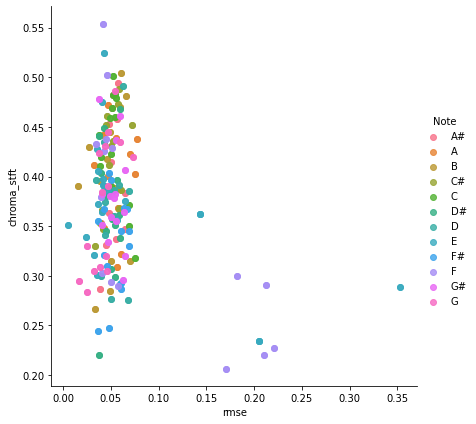

In [ ]:

vis1 = sns.lmplot(data=Plotdata,x='rmse',y='chroma_stft',\
                 fit_reg= False, hue='Note',\
                 size=6,aspect=1)

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


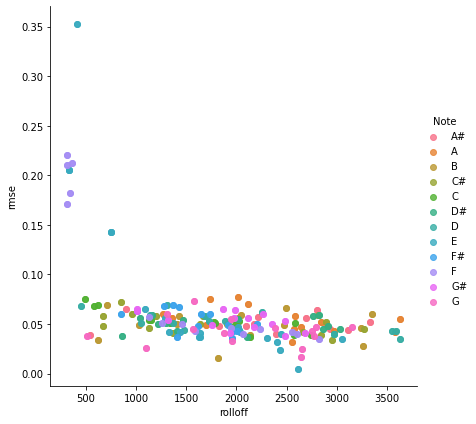

In [ ]:
vis1 = sns.lmplot(data=Plotdata,x='rolloff',y='rmse',\
                 fit_reg= False, hue='Note',\
                 size=6,aspect=1)

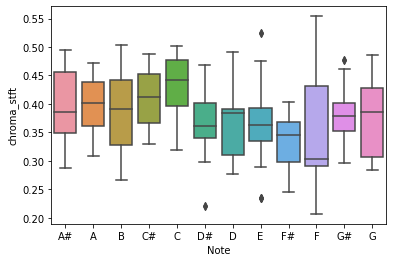

In [ ]:
w = sns.boxplot(data=Plotdata,x='Note',y='chroma_stft')

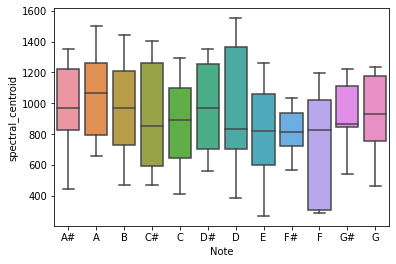

In [ ]:
w = sns.boxplot(data=Plotdata,x='Note',y='spectral_centroid')

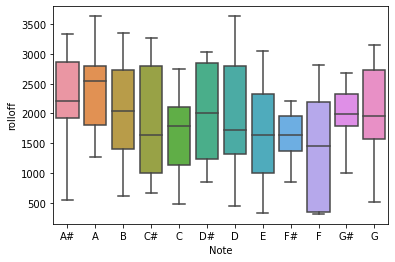

In [ ]:
w = sns.boxplot(data=Plotdata,x='Note',y='rolloff')

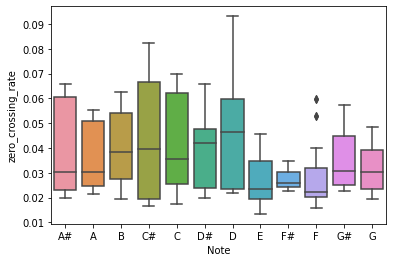

In [ ]:
w = sns.boxplot(data=Plotdata,x='Note',y='zero_crossing_rate')

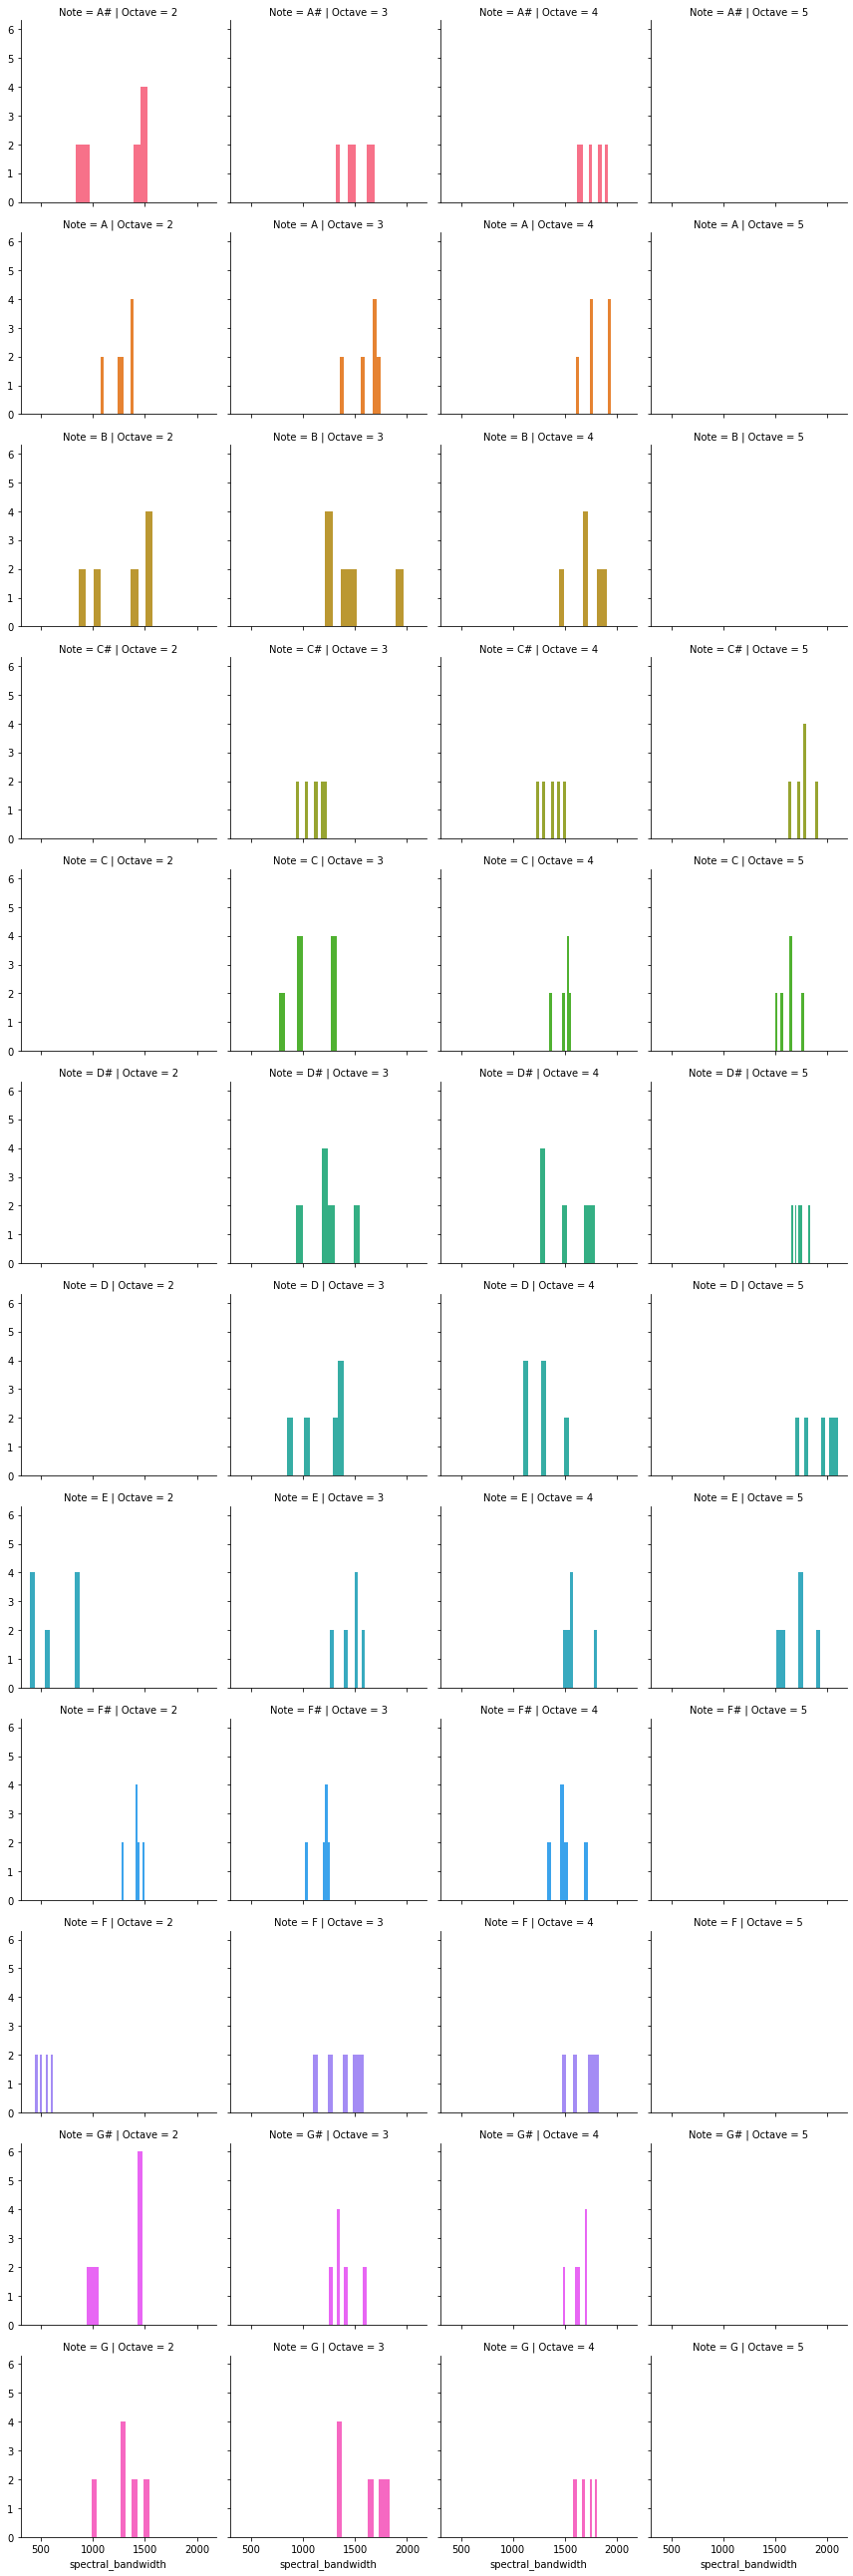

In [ ]:
g = sns.FacetGrid(Plotdata,row='Note',col='Octave',hue='Note')
g = g.map(plt.hist,'spectral_bandwidth')

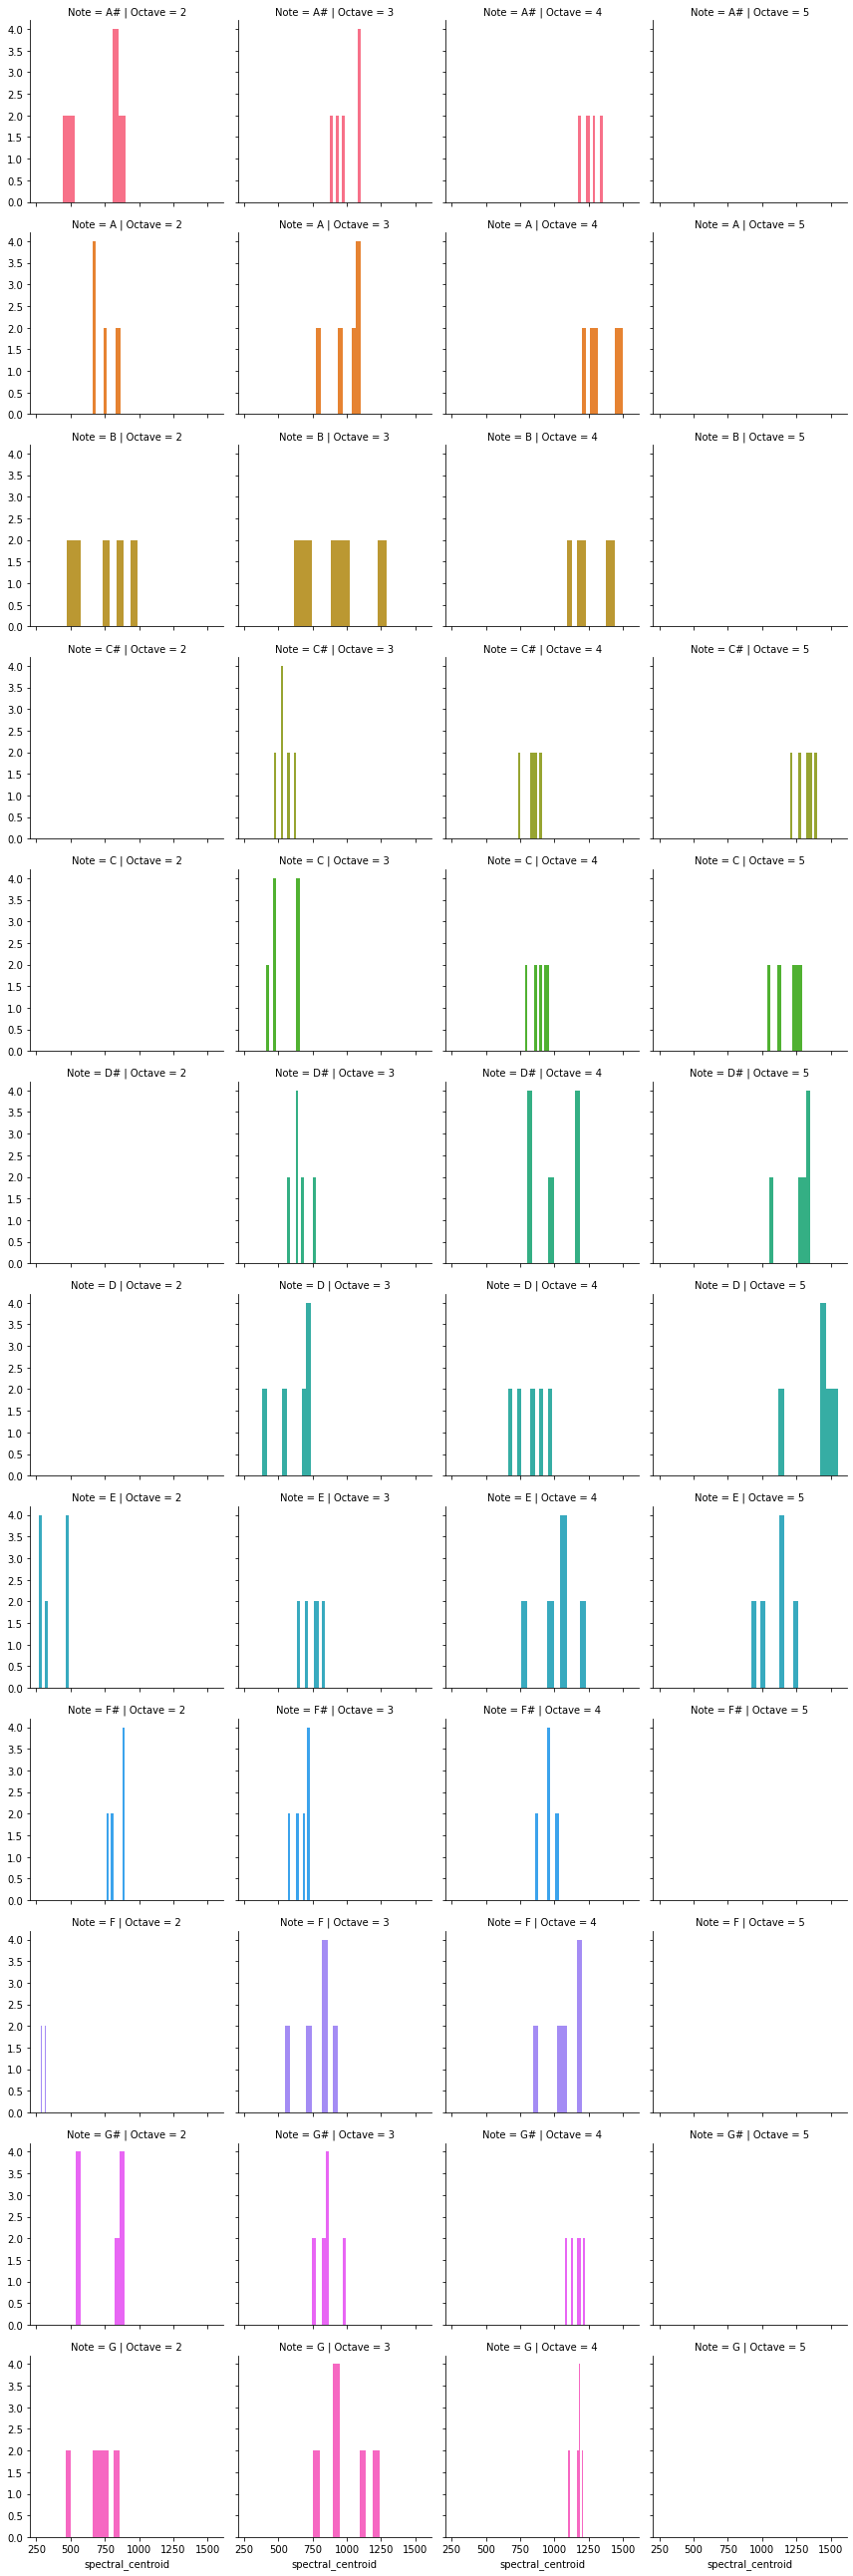

In [ ]:
g = sns.FacetGrid(Plotdata,row='Note',col='Octave',hue='Note')
g = g.map(plt.hist,'spectral_centroid')

It is evident based on initial visualizations of the sound features that there are many deep, non linear relationships connecting to how these are translated into the notes we want to predict.  It's not simple to try and eliminate some of these, regardless of correlation/redundancy.  Musical notes are exceptional in that even at high/low frequencies in different octaves, a note still retains it's class as the same note (E5 note and E2 notes are still E notes)

Split data into test/training, stratified over classes (the notes), scaling the data, and encoding the notes into integer classes

In [ ]:
print(data.head)

#Encoding the Labels,  Notes are assigned integer labels 1-12, but are encoded from 0-11 in this step
Labels = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(Labels)
#Scaling the Feature columns
#All features
X = data.iloc[:, 1:27]
#all but MFCC
#X = data.iloc[:, 1:7]
scaler = StandardScaler()
X = scaler.fit_transform(np.array(X, dtype = float))
#Dividing data into training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,stratify=y)

<bound method NDFrame.head of          filename  chroma_stft      rmse  ...  Code-Note-Oct  Octave  Code-Note
0       A#2-0.wav     0.494609  0.057445  ...              1       2          1
1       A#2-1.wav     0.452797  0.048388  ...              1       2          1
2       A#2-2.wav     0.469317  0.051306  ...              1       2          1
3       A#2-3.wav     0.286503  0.038913  ...              1       2          1
4       A#2-4.wav     0.347150  0.064649  ...              1       2          1
..            ...          ...       ...  ...            ...     ...        ...
365  copyG4-0.wav     0.330313  0.024994  ...             36       4         12
366  copyG4-1.wav     0.295049  0.016675  ...             36       4         12
367  copyG4-2.wav     0.390352  0.047020  ...             36       4         12
368  copyG4-3.wav     0.423649  0.037460  ...             36       4         12
369  copyG4-4.wav     0.304418  0.045572  ...             36       4         12

[370 rows

Model 1, basic DNN with sound features from librosa as input

In [ ]:
#many nodes/layers, with dropout to prevent overfitting, with sparse categorical crossentropy as loss/softmax activation to predict multiclasses without multi hot coding many columns
model = Sequential()
model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.6))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(12, activation='softmax'))
tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               13824     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

In [ ]:
es = EarlyStopping(monitor='val_sparse_categorical_accuracy', mode='max', 
                   patience=40, 
                   verbose=1)

In [ ]:
classifier = model.fit(X_train,
                    y_train, validation_data=(X_test, y_test),
                    epochs=250, verbose=1,
                    batch_size=2,callbacks=[es])

Epoch 1/250
111/111 [==============================] - 0s 4ms/step - loss: 2.6023 - sparse_categorical_accuracy: 0.1081 - val_loss: 2.4617 - val_sparse_categorical_accuracy: 0.1149
Epoch 2/250
111/111 [==============================] - 0s 3ms/step - loss: 2.5455 - sparse_categorical_accuracy: 0.0676 - val_loss: 2.4394 - val_sparse_categorical_accuracy: 0.1284
Epoch 3/250
111/111 [==============================] - 0s 3ms/step - loss: 2.5023 - sparse_categorical_accuracy: 0.1126 - val_loss: 2.4332 - val_sparse_categorical_accuracy: 0.0946
Epoch 4/250
111/111 [==============================] - 0s 3ms/step - loss: 2.4879 - sparse_categorical_accuracy: 0.1036 - val_loss: 2.4101 - val_sparse_categorical_accuracy: 0.1554
Epoch 5/250
111/111 [==============================] - 0s 3ms/step - loss: 2.4717 - sparse_categorical_accuracy: 0.1351 - val_loss: 2.3140 - val_sparse_categorical_accuracy: 0.2500
Epoch 6/250
111/111 [==============================] - 0s 3ms/step - loss: 2.4755 - sparse_cate

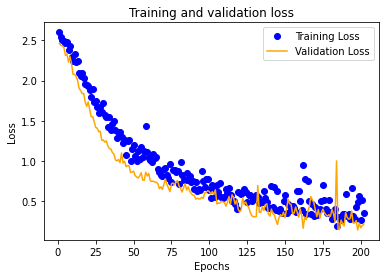

In [ ]:
history_dict = classifier.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss'] 
epochs = range(1, len(loss_values) + 1) 
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show() #Excellent Results, no over/underfitting issues, good convergence

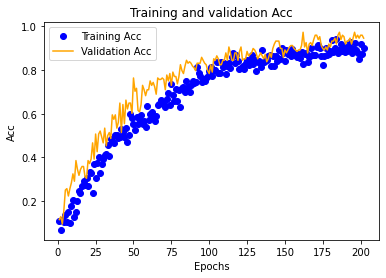

In [ ]:
history_dict = classifier.history
loss_values = history_dict['sparse_categorical_accuracy'] 
val_loss_values = history_dict['val_sparse_categorical_accuracy'] 
epochs = range(1, len(loss_values) + 1) 
plt.plot(epochs, loss_values, 'bo', label='Training Acc')
plt.plot(epochs, val_loss_values, 'orange', label='Validation Acc')
plt.title('Training and validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

Savings results/tabulating

In [ ]:
#Training dataset
yhat_train_classes = model.predict_classes(X_train, verbose=0)
yhat_test_classes = model.predict_classes(X_test, verbose=0)


#predicted values
myPreds = np.ndarray.flatten(yhat_train_classes)
myPreds = pd.DataFrame(myPreds)
myPreds.reset_index(drop=True)
myPreds.rename(columns={0: "pred"}, inplace=True)
#actual values
myActual = pd.DataFrame(np.array(y_train))
myActual.reset_index(drop=True)
myActual.rename(columns={0: "actual"}, inplace=True)
allResults = pd.concat([myActual,myPreds], axis=1)
allResults.info()
allResults['pred_class'] = allResults['pred']
allResults.loc[(allResults.pred==0),'pred_class']='A#'
allResults.loc[(allResults.pred==1),'pred_class']='A'
allResults.loc[(allResults.pred==2),'pred_class']='B'
allResults.loc[(allResults.pred==3),'pred_class']='C#'
allResults.loc[(allResults.pred==4),'pred_class']='C'
allResults.loc[(allResults.pred==5),'pred_class']='D#'
allResults.loc[(allResults.pred==6),'pred_class']='D'
allResults.loc[(allResults.pred==7),'pred_class']='E'
allResults.loc[(allResults.pred==8),'pred_class']='F#'
allResults.loc[(allResults.pred==9),'pred_class']='F'
allResults.loc[(allResults.pred==10),'pred_class']='G#'
allResults.loc[(allResults.pred==11),'pred_class']='G'
allResults.to_csv(r'/content/drive/My Drive/Colab Notebooks/project/Model Results/Training.csv',index = None, header=True)
allResults

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   actual  222 non-null    int64
 1   pred    222 non-null    int64
dtypes: int64(2)
memory usage: 3.6 KB


,actual,pred,pred_class
0,10,10,G#
1,2,2,B
2,3,3,C#
3,0,0,A#
4,1,1,A
...,...,...,...
217,5,5,D#
218,7,7,E
219,1,1,A
220,5,5,D#


In [ ]:
# Test dataset
#predicted values
myPreds = np.ndarray.flatten(yhat_test_classes)
myPreds = pd.DataFrame(myPreds)
myPreds.reset_index(drop=True)
myPreds.rename(columns={0: "test"}, inplace=True)
#actual predictions
myActual = pd.DataFrame(np.array(y_test))
myActual.reset_index(drop=True)
myActual.rename(columns={0: "actual"}, inplace=True)
allResults = pd.concat([myActual,myPreds], axis=1)
allResults['test_class'] = allResults['test']
allResults.loc[(allResults.test==0),'test_class']='A#'
allResults.loc[(allResults.test==1),'test_class']='A'
allResults.loc[(allResults.test==2),'test_class']='B'
allResults.loc[(allResults.test==3),'test_class']='C#'
allResults.loc[(allResults.test==4),'test_class']='C'
allResults.loc[(allResults.test==5),'test_class']='D#'
allResults.loc[(allResults.test==6),'test_class']='D'
allResults.loc[(allResults.test==7),'test_class']='E'
allResults.loc[(allResults.test==8),'test_class']='F#'
allResults.loc[(allResults.test==9),'test_class']='F'
allResults.loc[(allResults.test==10),'test_class']='G#'
allResults.loc[(allResults.test==11),'test_class']='G'
allResults.to_csv(r'/content/drive/My Drive/Colab Notebooks/project/Model Results/Testing.csv',index = None, header=True)
allResults

,actual,test,test_class
0,5,5,D#
1,0,0,A#
2,11,11,G
3,7,7,E
4,8,8,F#
...,...,...,...
143,1,1,A
144,10,10,G#
145,5,5,D#
146,2,2,B


In [ ]:
# make predictions on the testing data
from sklearn.metrics import classification_report, confusion_matrix
#Confusion Matrix and Classification Report

y_true = y_test
y_pred = model.predict_classes(X_test, verbose=0)
target_names = ['A#','A','B','C#','C','D#','D','E','F#','F','G#','G'] 

print(classification_report(y_true, y_pred, target_names=target_names))

#matrix = confusion_matrix(Xbin_val, ybin_val)

# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)
# reduce to 1d array

matrix = confusion_matrix(y_test, y_pred)
matrix = pd.DataFrame(matrix)
matrix.index = ['A#','A','B','C#','C','D#','D','E','F#','F','G#','G'] 
matrix.columns=['A#','A','B','C#','C','D#','D','E','F#','F','G#','G']
print(matrix)  #very good results, but the few mistakes/misclassifications are not close to other notes, they're distant

              precision    recall  f1-score   support

          A#       1.00      1.00      1.00        12
           A       1.00      1.00      1.00        12
           B       1.00      0.83      0.91        12
          C#       1.00      1.00      1.00        12
           C       0.86      1.00      0.92        12
          D#       1.00      1.00      1.00        12
           D       0.83      0.83      0.83        12
           E       0.88      0.88      0.88        16
          F#       1.00      1.00      1.00        12
           F       1.00      0.83      0.91        12
          G#       1.00      1.00      1.00        12
           G       0.86      1.00      0.92        12

    accuracy                           0.95       148
   macro avg       0.95      0.95      0.95       148
weighted avg       0.95      0.95      0.95       148

    A#   A   B  C#   C  D#   D   E  F#   F  G#   G
A#  12   0   0   0   0   0   0   0   0   0   0   0
A    0  12   0   0   0   0   0 

In [ ]:
model.save("/content/drive/My Drive/Colab Notebooks/project/Model Results/MusicalNote_Model_CNN_wam08002.h5")

Conv NNet Preparation

In [ ]:
#this next set of cells/steps are recreating the Training/Validation folders and throwing the new ordered sets in their respective folders on the cloud
#The file order shuffling with stratification is extremely import, and I wasn't able to find a way to do it easily, so I had to come up with these steps
#Csv files were created here for training/testing containing the order of the image files to be fed into the model, while stratifying over the y variable (notes to predict)
Labels = data.iloc[:, -1]
encoder = LabelEncoder()
yi = encoder.fit_transform(Labels)

Xi = data.iloc[:, 0:1]

#Dividing data into training and Testing set
X_traini, X_testi, y_traini, y_testi = train_test_split(Xi, yi, test_size=0.4,stratify=yi)

#using stratification here to set up training/val image split,  manually created the directories for the split and uploaded it
print(X_traini['filename'])

str1=".png"
str0 = X_traini.filename.str.rstrip('.wav')
str2 = X_testi.filename.str.rstrip('.wav')
reader = str0 + str1
reader2 = str2 + str1
reader.to_csv(r'/content/drive/My Drive/Colab Notebooks/project/X_traini.csv',index = None, header=True) #these CSV preserve the order of img files to be inserted to the model from above
reader2.to_csv(r'/content/drive/My Drive/Colab Notebooks/project/X_testi.csv',index = None, header=True)

261    copyD#3-1.wav
219     copyB2-4.wav
319    copyF#3-4.wav
166        G#4-1.wav
250     copyC4-0.wav
           ...      
170         G2-0.wav
218     copyB2-3.wav
32          B2-2.wav
174         G2-4.wav
323    copyF#4-3.wav
Name: filename, Length: 222, dtype: object


below deletes/creates training/validation directories

In [ ]:
import shutil  #these run, but they're not always consistent, be sure to check if code executes properly by checking the directories.
shutil.rmtree('/content/drive/My Drive/Colab Notebooks/project/Train/')

newpath = r'/content/drive/My Drive/Colab Notebooks/project/Train' 
if not os.path.exists(newpath):
    os.makedirs(newpath)

In [ ]:
shutil.rmtree('/content/drive/My Drive/Colab Notebooks/project/Validation/')

newpath = r'/content/drive/My Drive/Colab Notebooks/project/Validation' 
if not os.path.exists(newpath):
    os.makedirs(newpath)


In [ ]:
#this script is used to take the above created csv files (traini and testi), that were used as filename order reference, which then takes corresponding images 
#and separate/copy them to a train/validation selected folder in cloud
#based on the train/validation split which was stratified by note class... ***so this particuarly block of code ensures training/validation folders have the right image files*** 
#X_traini filenames should match the files/filenames of images in the Training folder
#This first part is for the training set
from tkinter import * 
from tkinter import filedialog

filePath = (r'/content/drive/My Drive/Colab Notebooks/project/X_traini.csv')
folderPath = (r'/content/drive/My Drive/Colab Notebooks/project/img_data/')
destination = (r'/content/drive/My Drive/Colab Notebooks/project/Train')

# First, create a list and populate it with the files

# you want to find (1 file per row in myfiles.txt/csv)

filesToFind = []
file = open(filePath, 'r')
with file as fh:
  for row in file:
    filesToFind.append(row.strip())

# Had an issue here but needed to define and then reference the filename variable itself 
for filename in os.listdir(folderPath):
    if filename in filesToFind:
        filename = filename = os.path.join(folderPath, filename)
        shutil.copy(filename, destination)
    else:
        print("file does not exist: filename")

In [ ]:
#This next part is for the validation set
from tkinter import * 
from tkinter import filedialog

filePath = (r'/content/drive/My Drive/Colab Notebooks/project/X_testi.csv')
folderPath = (r'/content/drive/My Drive/Colab Notebooks/project/img_data/')
destination = (r'/content/drive/My Drive/Colab Notebooks/project/Validation')

filesToFind = []
file = open(filePath, 'r')
with file as fh:
  for row in file:
    filesToFind.append(row.strip())

# Had an issue here but needed to define and then reference the filename variable itself 
for filename in os.listdir(folderPath):
    if filename in filesToFind:
        filename = filename = os.path.join(folderPath, filename)
        shutil.copy(filename, destination)
    else:
        print("file does not exist: filename")

In [ ]:
# define images data file path
path = "/content/drive/My Drive/Colab Notebooks/project/"
train_dir = path + "Train/"
val_dir = path + "Validation/"
result = path + "Model Results/"

In [ ]:
#del temp, repo, filesToFind, filesRef, cols, filename, image, x_train_images, x_train, x_val, x_val_images
#Use the above to reset variables below if necessary

In [ ]:
#Training data is loaded into x_train variable per order of the data set splitter, this is training
filesToFind = []
filesRef = []
x_train_images = []

for row in reader:
    filesToFind.append(row.strip())

#filesToFind = pd.DataFrame(filesToFind,columns=['filename'])
#rftf = filesToFind.filename.str.rstrip('.wav')

for filename in os.listdir(f'/content/drive/My Drive/Colab Notebooks/project/Train'):
  temp = f'/content/drive/My Drive/Colab Notebooks/project/Train/{filename}'
  repo = f'{filename}'
  filesRef.append([repo])

filesRef = pd.DataFrame(filesRef,columns=['filename'])
rfr = filesRef.filename.str.rstrip('.wav')

filesToFind = []

for row in reader:
    filesToFind.append(row.strip())

filesRef = []

for row in rfr:
    filesRef.append(row.strip())

for filename in filesToFind:
  if filename in filesRef:
    image = cv2.imread(train_dir+filename)
    x_train_images.append(image)
x_train = np.array(x_train_images)

In [ ]:
#val data per order of the splitter, this is validation
filesToFind = []
filesRef = []
x_val_images = []

for row in reader2:
    filesToFind.append(row.strip())

filesToFind = pd.DataFrame(filesToFind,columns=['filename'])
rftf = filesToFind.filename.str.rstrip('.wav')

for filename in os.listdir(f'/content/drive/My Drive/Colab Notebooks/project/Validation'):
  temp = f'/content/drive/My Drive/Colab Notebooks/project/Validation/{filename}'
  repo = f'{filename}'
  filesRef.append([repo])

filesRef = pd.DataFrame(filesRef,columns=['filename'])
rfr = filesRef.filename.str.rstrip('.wav')

filesToFind = []

for row in reader2:
    filesToFind.append(row.strip())

filesRef = []

for row in rfr:
    filesRef.append(row.strip())

for filename in filesToFind:
  if filename in filesRef:
    image = cv2.imread(val_dir+filename)
    x_val_images.append(image)
x_val = np.array(x_val_images)

In [ ]:
# save loaded and converted image data 
savez_compressed(path+'train_data.npz', x_train)
savez_compressed(path+'val_data.npz', x_val)


In [ ]:
# load image numpy array from npz file if need be, shouldn't be necessary unless you just want to skip to this step and load what's already saved, I would skip to here if you didn't want to mess with integrity of CNN\
#final model that's already in drive.
from numpy import load
# load dict of arrays
train_data = load(path+'train_data.npz')
x_train = train_data['arr_0']
val_data = load(path+'val_data.npz')
x_val = val_data['arr_0']



The entire purpose of the above, is to utilize stratification of multiclass outcomes that we're trying to predict.  random/uniform shuffling does not ensure robust proportional dispersion of training/validation set

Conv Model

In [ ]:
print("Image train dataset shape: ", x_train.shape)
print("Image validation dataset shape: ", x_val.shape)

#print(y_testi.shape)
#print(y_traini.shape)
#checking shape


Image train dataset shape:  (222, 576, 576, 3)
Image validation dataset shape:  (148, 576, 576, 3)


In [ ]:
Input_shape = x_train.shape
Input_shape = Input_shape[1:4]
Input_shape

(576, 576, 3)

In [ ]:
#CNN with two Conv2D and 2Max2D layers, and a 3 layer DNN,  NO DROPOUT, and RELU only in first Conv2D
model2 = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model2.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', input_shape=Input_shape)) 
model2.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model2.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same'))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(64))
model2.add(tf.keras.layers.Dense(32))
model2.add(tf.keras.layers.Dense(12, activation='softmax'))
tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])
model2.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 576, 576, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 288, 288, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 288, 288, 64)      73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 144, 144, 64)      0         
_________________________________________________________________
flatten (Flatten)            (None, 1327104)           0         
_________________________________________________________________
dense (Dense)                (None, 64)                84934720  
_________________________________________________________________
dense_1 (Dense)              (None, 32)               

In [ ]:
es = EarlyStopping(monitor='val_sparse_categorical_accuracy', mode='max', 
                   patience=30, 
                   verbose=1)

In [ ]:
# train the model
print("[INFO] training model...")
history = model2.fit(x_train, y_traini, validation_data=(x_val, y_testi), epochs=100, batch_size=2,verbose=1,callbacks=[es])

[INFO] training model...
Epoch 1/100
111/111 [==============================] - 14s 129ms/step - loss: 19811.7168 - sparse_categorical_accuracy: 0.1351 - val_loss: 745.7030 - val_sparse_categorical_accuracy: 0.2973
Epoch 2/100
111/111 [==============================] - 14s 127ms/step - loss: 183.4354 - sparse_categorical_accuracy: 0.5991 - val_loss: 20.6509 - val_sparse_categorical_accuracy: 0.8243
Epoch 3/100
111/111 [==============================] - 14s 127ms/step - loss: 27.8458 - sparse_categorical_accuracy: 0.8604 - val_loss: 2.3688 - val_sparse_categorical_accuracy: 0.9392
Epoch 4/100
111/111 [==============================] - 14s 127ms/step - loss: 9.0886 - sparse_categorical_accuracy: 0.9414 - val_loss: 10.7546 - val_sparse_categorical_accuracy: 0.8851
Epoch 5/100
111/111 [==============================] - 14s 127ms/step - loss: 5.0573 - sparse_categorical_accuracy: 0.9505 - val_loss: 5.5537 - val_sparse_categorical_accuracy: 0.9189
Epoch 6/100
111/111 [=======================

In [ ]:
model2.save("/content/drive/My Drive/Colab Notebooks/project/Model Results/MusicalNote_Model_CNN_wam08002.h5")

In [ ]:
# custom batched prediction loop to avoid memory leak issues for now in the model2.predict call -----TRAINING
# There is an issue with current version of Tensorflow (2.1?),  I couldn't run  model.predict_classes, there was OOM (out of memory) errors so this is a workaround to get model predictions
y_pred_probs = np.empty([len(x_train), 12], dtype=np.float32)  # pre-allocate required memory for array for efficiency
BATCH_SIZE = 2
BATCH_INDICES = np.arange(start=0, stop=len(x_train), step=BATCH_SIZE)  # row indices of batches
BATCH_INDICES = np.append(BATCH_INDICES, len(x_train))  # add final batch_end row

for index in np.arange(len(BATCH_INDICES) - 1):
    batch_start = BATCH_INDICES[index]  # first row of the batch
    batch_end = BATCH_INDICES[index + 1]  # last row of the batch
    y_pred_probs[batch_start:batch_end] = model2.predict_on_batch(x_train[batch_start:batch_end])

In [ ]:
# custom batched prediction loop to avoid memory leak issues for now in the model2.predict call -----Validation
y_pred_probs2 = np.empty([len(x_val), 12], dtype=np.float32)  # pre-allocate required memory for array for efficiency
BATCH_SIZE = 2
BATCH_INDICES = np.arange(start=0, stop=len(x_val), step=BATCH_SIZE)  # row indices of batches
BATCH_INDICES = np.append(BATCH_INDICES, len(x_val))  # add final batch_end row

for index in np.arange(len(BATCH_INDICES) - 1):
    batch_start = BATCH_INDICES[index]  # first row of the batch
    batch_end = BATCH_INDICES[index + 1]  # last row of the batch
    y_pred_probs2[batch_start:batch_end] = model2.predict_on_batch(x_val[batch_start:batch_end])

In [ ]:
y_pred_probs1 = pd.DataFrame(y_pred_probs) #training
y_pred_probs1['max']=y_pred_probs1.idxmax(axis=1) #max here is referring to the highest probability output by model, and therfore the predicted class (note)
y_pred_probs1.to_csv(r'/content/drive/My Drive/Colab Notebooks/project/Model Results/Model2Results.csv',index = None, header=True)
y_pred_probs1

,0,1,2,3,4,5,6,7,8,9,10,11,max
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11
218,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
219,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11


In [ ]:
y_pred_probs3 = pd.DataFrame(y_pred_probs2) #Validation
y_pred_probs3['max']=y_pred_probs3.idxmax(axis=1)
y_pred_probs3.to_csv(r'/content/drive/My Drive/Colab Notebooks/project/Model Results/Model2ResultsVal.csv',index = None, header=True)
y_pred_probs3

,0,1,2,3,4,5,6,7,8,9,10,11,max
0,0.0,0.0,0.0,1.594841e-30,1.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,4
1,0.0,0.0,0.0,0.000000e+00,1.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,4
2,0.0,0.0,0.0,0.000000e+00,0.0,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,9
3,0.0,0.0,0.0,0.000000e+00,0.0,0.968587,0.0,0.0,0.0,0.031413,0.0,0.0,5
4,0.0,0.0,0.0,0.000000e+00,0.0,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,1.0,0.0,0.0,0.000000e+00,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0
144,0.0,0.0,0.0,0.000000e+00,0.0,0.000000,0.0,0.0,1.0,0.000000,0.0,0.0,8
145,0.0,0.0,0.0,0.000000e+00,0.0,0.000000,0.0,0.0,0.0,0.000000,1.0,0.0,10
146,0.0,0.0,1.0,0.000000e+00,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


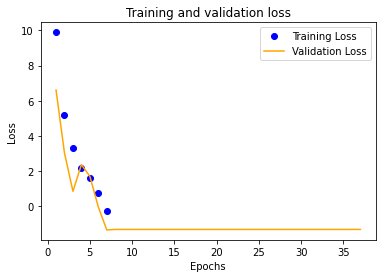

In [ ]:
history_dict = history.history
loss_values = np.log(history_dict['loss']) 
val_loss_values = np.log(history_dict['val_loss']) 
epochs = range(1, len(loss_values) + 1) 
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()  #this model KICKS BUTT, CNN was nearly perfect at identifying notes

In [ ]:
#yhat_train_classes = model2.predict_classes(x_train, verbose=0) <-- These do not work right now for some reason due to memory leaks
#yhat_test_classes = model2.predict_classes(x_val, verbose=0)


In [ ]:
#Training results
yhat_train_classes = np.array(y_pred_probs1['max'])

#predicted values
myPreds = np.ndarray.flatten(yhat_train_classes)
myPreds = pd.DataFrame(myPreds)
myPreds.reset_index(drop=True)
myPreds.rename(columns={0: "pred"}, inplace=True)
#actual values
myActual = pd.DataFrame(np.array(y_traini))
myActual.reset_index(drop=True)
myActual.rename(columns={0: "actual"}, inplace=True)
allResults = pd.concat([myActual,myPreds], axis=1)
allResults.info()
allResults['pred_class'] = allResults['pred']
allResults.loc[(allResults.pred==0),'pred_class']='A#'
allResults.loc[(allResults.pred==1),'pred_class']='A'
allResults.loc[(allResults.pred==2),'pred_class']='B'
allResults.loc[(allResults.pred==3),'pred_class']='C#'
allResults.loc[(allResults.pred==4),'pred_class']='C'
allResults.loc[(allResults.pred==5),'pred_class']='D#'
allResults.loc[(allResults.pred==6),'pred_class']='D'
allResults.loc[(allResults.pred==7),'pred_class']='E'
allResults.loc[(allResults.pred==8),'pred_class']='F#'
allResults.loc[(allResults.pred==9),'pred_class']='F'
allResults.loc[(allResults.pred==10),'pred_class']='G#'
allResults.loc[(allResults.pred==11),'pred_class']='G'
allResults.to_csv(r'/content/drive/My Drive/Colab Notebooks/project/Model Results/Training2.csv',index = None, header=True)
allResults

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   actual  222 non-null    int64
 1   pred    222 non-null    int64
dtypes: int64(2)
memory usage: 3.6 KB


,actual,pred,pred_class
0,5,5,D#
1,2,2,B
2,8,8,F#
3,10,10,G#
4,4,4,C
...,...,...,...
217,11,11,G
218,2,2,B
219,2,2,B
220,11,11,G


In [ ]:
# Test results
yhat_test_classes = np.array(y_pred_probs3['max'])
#predicted values
myPreds = np.ndarray.flatten(yhat_test_classes)
myPreds = pd.DataFrame(myPreds)
myPreds.reset_index(drop=True)
myPreds.rename(columns={0: "test"}, inplace=True)
#actual predictions
myActual = pd.DataFrame(np.array(y_testi))
myActual.reset_index(drop=True)
myActual.rename(columns={0: "actual"}, inplace=True)
allResults = pd.concat([myActual,myPreds], axis=1)
allResults['test_class'] = allResults['test']
allResults.loc[(allResults.test==0),'test_class']='A#'
allResults.loc[(allResults.test==1),'test_class']='A'
allResults.loc[(allResults.test==2),'test_class']='B'
allResults.loc[(allResults.test==3),'test_class']='C#'
allResults.loc[(allResults.test==4),'test_class']='C'
allResults.loc[(allResults.test==5),'test_class']='D#'
allResults.loc[(allResults.test==6),'test_class']='D'
allResults.loc[(allResults.test==7),'test_class']='E'
allResults.loc[(allResults.test==8),'test_class']='F#'
allResults.loc[(allResults.test==9),'test_class']='F'
allResults.loc[(allResults.test==10),'test_class']='G#'
allResults.loc[(allResults.test==11),'test_class']='G'
allResults.to_csv(r'/content/drive/My Drive/Colab Notebooks/project/Model Results/Testing2.csv',index = None, header=True)
allResults

,actual,test,test_class
0,4,4,C
1,4,4,C
2,9,9,F
3,5,5,D#
4,9,9,F
...,...,...,...
143,0,0,A#
144,8,8,F#
145,10,10,G#
146,2,2,B


In [ ]:
#Confusion Matrix and Classification Report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

y_true = y_testi
y_pred = yhat_test_classes
target_names = ['A#','A','B','C#','C','D#','D','E','F#','F','G#','G'] 

print(classification_report(y_true, y_pred, target_names=target_names))

yhat_classes = yhat_test_classes


matrix = confusion_matrix(y_testi, y_pred)
matrix = pd.DataFrame(matrix)
matrix.index = ['A#','A','B','C#','C','D#','D','E','F#','F','G#','G'] 
matrix.columns=['A#','A','B','C#','C','D#','D','E','F#','F','G#','G']
print(matrix)

              precision    recall  f1-score   support

          A#       1.00      1.00      1.00        12
           A       1.00      1.00      1.00        12
           B       1.00      1.00      1.00        12
          C#       0.86      1.00      0.92        12
           C       1.00      1.00      1.00        12
          D#       1.00      1.00      1.00        12
           D       1.00      0.83      0.91        12
           E       1.00      1.00      1.00        16
          F#       1.00      1.00      1.00        12
           F       1.00      1.00      1.00        12
          G#       1.00      1.00      1.00        12
           G       1.00      1.00      1.00        12

    accuracy                           0.99       148
   macro avg       0.99      0.99      0.99       148
weighted avg       0.99      0.99      0.99       148

    A#   A   B  C#   C  D#   D   E  F#   F  G#   G
A#  12   0   0   0   0   0   0   0   0   0   0   0
A    0  12   0   0   0   0   0 

Excellent model results,  it should be expected that this model performs better.  Each note recording should produce a consisent spectogram/image.

The only error this model had, predicted just ONE halfstep (note not interval difference) incorrectly.  C# and D are adjacent notes in the chromatic scale (all the 12 notes in order)